In [1]:
import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [84]:
train_df = pd.read_csv('project_data_files/book_rating_train.csv')
test_df = pd.read_csv('project_data_files/book_rating_test.csv')

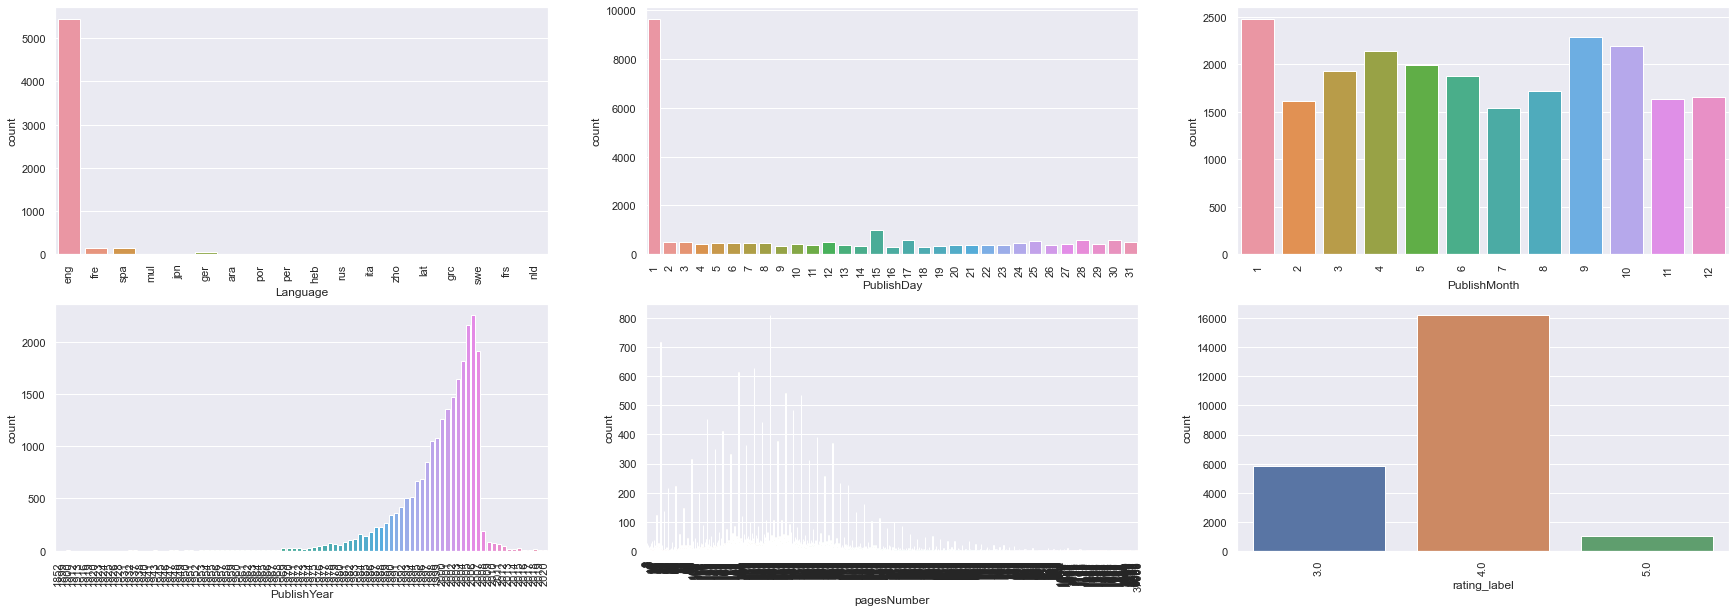

In [21]:
# plot distribution of each feature
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 10))
sns.countplot(x="Language", data=train_df, ax=axs[0, 0])
sns.countplot(x="PublishDay", data=train_df, ax=axs[0, 1])
sns.countplot(x="PublishMonth", data=train_df, ax=axs[0, 2])
sns.countplot(x="PublishYear", data=train_df, ax=axs[1, 0])
sns.countplot(x="pagesNumber", data=train_df, ax=axs[1, 1])
sns.countplot(x="rating_label", data=train_df, ax=axs[1, 2])

# tilt x-axis labels
for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
plt.show()

In [85]:
train_df = train_df.drop(columns=['Language', 'PublishDay', 'Name', 'Authors', 'Description', 'PublishYear', 'PublishMonth'], axis=1)
train_df.head()

,Publisher,pagesNumber,rating_label
0,Teaching Resources,48,4.0
1,DoubleDay,364,4.0
2,Chronicle Books,32,4.0
3,Bison Books,293,4.0
4,Penguin Books Ltd,352,3.0


In [86]:
author_vec = pd.read_csv(r"project_data_files/book_text_features_doc2vec/book_text_features_doc2vec/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
for i in range(20):
    train_df['Author_' + str(i)] = author_vec[i]

train_df.head()

,Publisher,pagesNumber,rating_label,Author_0,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,...,Author_10,Author_11,Author_12,Author_13,Author_14,Author_15,Author_16,Author_17,Author_18,Author_19
0,Teaching Resources,48,4.0,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,0.306277,...,0.329671,0.343979,0.018261,0.115687,-0.111172,0.068306,0.158065,0.053510,-0.136804,-0.084448
1,DoubleDay,364,4.0,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,0.172967,...,0.400349,0.065201,0.349188,0.020555,0.281087,0.231422,0.129853,-0.213233,-0.081253,-0.204687
2,Chronicle Books,32,4.0,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,-0.051163,...,0.225617,-0.004355,0.173353,0.087015,0.106534,0.040950,0.209152,-0.215313,-0.177547,-0.178094
3,Bison Books,293,4.0,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,-0.133912,...,0.133304,-0.069995,0.206028,0.089625,0.157605,0.131767,0.244849,-0.321698,-0.198365,-0.208098
4,Penguin Books Ltd,352,3.0,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,-0.005331,...,0.224210,0.049880,0.003623,0.062291,-0.030742,0.130882,0.295086,-0.061550,-0.244197,-0.272161


In [87]:
name_vec = pd.read_csv(r"project_data_files/book_text_features_doc2vec/book_text_features_doc2vec/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
for i in range(100):
    train_df['Name_' + str(i)] = name_vec[i]

train_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\612441367.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['Name_' + str(i)] = name_vec[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\612441367.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['Name_' + str(i)] = name_vec[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\612441367.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

,Publisher,pagesNumber,rating_label,Author_0,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,...,Name_90,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99
0,Teaching Resources,48,4.0,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,0.306277,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,DoubleDay,364,4.0,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,0.172967,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,Chronicle Books,32,4.0,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,-0.051163,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,Bison Books,293,4.0,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,-0.133912,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,Penguin Books Ltd,352,3.0,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,-0.005331,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293


In [88]:
train_df['pagesNumber'] = train_df['pagesNumber'].apply(lambda x: np.nan if x < 10 else x)

In [89]:
mean = train_df['pagesNumber'].mean()
sd = train_df['pagesNumber'].std()
train_df = train_df[train_df['pagesNumber'] <= mean + 3 * sd]
train_df = train_df[train_df['pagesNumber'] >= mean - 3 * sd]
train_df

,Publisher,pagesNumber,rating_label,Author_0,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,...,Name_90,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99
0,Teaching Resources,48.0,4.0,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,0.306277,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,DoubleDay,364.0,4.0,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,0.172967,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,Chronicle Books,32.0,4.0,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,-0.051163,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,Bison Books,293.0,4.0,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,-0.133912,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,Penguin Books Ltd,352.0,3.0,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,-0.005331,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,2.13.61,120.0,4.0,-0.194677,0.063026,0.125115,-0.041354,-0.122502,-0.207333,-0.042279,...,-0.000418,-0.062899,0.048064,0.029612,0.191065,0.096081,-0.100516,-0.190299,0.224559,0.086601
23059,HMH Books for Young Readers,32.0,4.0,-0.115993,-0.003955,-0.027285,-0.032830,0.091905,-0.257285,-0.045624,...,0.150964,-0.029046,0.171029,-0.072123,-0.004459,0.247430,0.111973,0.019573,0.070569,-0.112066
23060,Rowman & Littlefield Publishers,132.0,4.0,-0.126878,-0.120418,0.198828,0.093403,-0.053232,-0.114909,-0.013179,...,0.193755,-0.118570,0.006740,-0.108623,-0.036143,0.168113,0.136478,0.087885,0.113180,0.000569
23061,New Amsterdam Books,136.0,4.0,-0.134530,-0.061256,0.178935,0.057537,-0.045066,-0.088796,-0.038559,...,0.009007,0.154127,0.219128,-0.305824,-0.017904,-0.059886,0.108616,0.041879,-0.138893,-0.044187


In [90]:
mean = train_df['pagesNumber'].mean()
print(mean)
train_df['pagesNumber'] = train_df['pagesNumber'].fillna(mean)
train_df

275.9122690709803


,Publisher,pagesNumber,rating_label,Author_0,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,...,Name_90,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99
0,Teaching Resources,48.0,4.0,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,0.306277,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,DoubleDay,364.0,4.0,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,0.172967,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,Chronicle Books,32.0,4.0,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,-0.051163,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,Bison Books,293.0,4.0,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,-0.133912,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,Penguin Books Ltd,352.0,3.0,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,-0.005331,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,2.13.61,120.0,4.0,-0.194677,0.063026,0.125115,-0.041354,-0.122502,-0.207333,-0.042279,...,-0.000418,-0.062899,0.048064,0.029612,0.191065,0.096081,-0.100516,-0.190299,0.224559,0.086601
23059,HMH Books for Young Readers,32.0,4.0,-0.115993,-0.003955,-0.027285,-0.032830,0.091905,-0.257285,-0.045624,...,0.150964,-0.029046,0.171029,-0.072123,-0.004459,0.247430,0.111973,0.019573,0.070569,-0.112066
23060,Rowman & Littlefield Publishers,132.0,4.0,-0.126878,-0.120418,0.198828,0.093403,-0.053232,-0.114909,-0.013179,...,0.193755,-0.118570,0.006740,-0.108623,-0.036143,0.168113,0.136478,0.087885,0.113180,0.000569
23061,New Amsterdam Books,136.0,4.0,-0.134530,-0.061256,0.178935,0.057537,-0.045066,-0.088796,-0.038559,...,0.009007,0.154127,0.219128,-0.305824,-0.017904,-0.059886,0.108616,0.041879,-0.138893,-0.044187


In [91]:
train_df['Publisher'] = train_df['Publisher'].fillna('Unknown')

In [92]:
data_df = train_df['Publisher'].value_counts()

In [93]:
# mark publishers with less than 10 books as 'Other'
train_df['Publisher'] = train_df['Publisher'].apply(lambda x: 'Other' if x in data_df[data_df < 10].index else x)

In [94]:
y_train = train_df['rating_label']
# y_test = test_df['rating_label']

X_train = train_df.drop(['rating_label'], axis=1)

In [95]:
X_train

,Publisher,pagesNumber,Author_0,Author_1,Author_2,Author_3,Author_4,Author_5,Author_6,Author_7,...,Name_90,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99
0,Other,48.0,0.359375,-0.096944,0.021326,0.304888,-0.084434,-0.138658,0.306277,0.418431,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,Other,364.0,-0.074845,0.060063,0.132891,0.051957,0.127083,0.017997,0.172967,0.376880,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,Chronicle Books,32.0,-0.127589,-0.100911,0.158580,0.046532,-0.065661,-0.037972,-0.051163,0.217950,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,Bison Books,293.0,-0.000472,-0.048197,0.106046,-0.100795,-0.147681,-0.017288,-0.133912,0.229301,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,Penguin Books Ltd,352.0,-0.162106,-0.023212,0.189444,-0.042658,-0.117135,-0.075968,-0.005331,0.141808,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23058,Other,120.0,-0.194677,0.063026,0.125115,-0.041354,-0.122502,-0.207333,-0.042279,0.283049,...,-0.000418,-0.062899,0.048064,0.029612,0.191065,0.096081,-0.100516,-0.190299,0.224559,0.086601
23059,HMH Books for Young Readers,32.0,-0.115993,-0.003955,-0.027285,-0.032830,0.091905,-0.257285,-0.045624,0.374351,...,0.150964,-0.029046,0.171029,-0.072123,-0.004459,0.247430,0.111973,0.019573,0.070569,-0.112066
23060,Rowman & Littlefield Publishers,132.0,-0.126878,-0.120418,0.198828,0.093403,-0.053232,-0.114909,-0.013179,0.289315,...,0.193755,-0.118570,0.006740,-0.108623,-0.036143,0.168113,0.136478,0.087885,0.113180,0.000569
23061,Other,136.0,-0.134530,-0.061256,0.178935,0.057537,-0.045066,-0.088796,-0.038559,0.219906,...,0.009007,0.154127,0.219128,-0.305824,-0.017904,-0.059886,0.108616,0.041879,-0.138893,-0.044187


In [96]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
# fit X_train
enc.fit(X_train[['Publisher']])
# # get feature names
feature_names = enc.get_feature_names_out(['Publisher'])
# # transform X_train
X_train_ohe = enc.transform(X_train[['Publisher']])
X_train_ohe = pd.DataFrame.sparse.from_spmatrix(X_train_ohe)
X_train_ohe.columns = feature_names
X_train_ohe

,Publisher_1st World Library - Literary Society,Publisher_ADV Manga,Publisher_AMACOM/American Management Association,Publisher_Abbeville Press,Publisher_Abingdon Press,Publisher_Ace,Publisher_Ace Books,Publisher_Adams Media,Publisher_Addison Wesley Publishing Company,Publisher_Addison-Wesley Professional,...,Publisher_Yearling,Publisher_Zebra,Publisher_Zed Books,Publisher_Zonderkidz,Publisher_Zondervan,Publisher_Zondervan Academic,Publisher_Zondervan Publishing Company,Publisher_eReads.com,Publisher_iBooks,Publisher_iUniverse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
mi = SelectKBest(mutual_info_classif, k=450)
X_train_ohe_mi = mi.fit_transform(X_train_ohe, y_train)
X_train_ohe_mi = pd.DataFrame.sparse.from_spmatrix(X_train_ohe_mi)
X_train_ohe_mi.columns = X_train_ohe.columns[mi.get_support()]
X_train_ohe_mi.head()

,Publisher_1st World Library - Literary Society,Publisher_ADV Manga,Publisher_AMACOM/American Management Association,Publisher_Abbeville Press,Publisher_Abingdon Press,Publisher_Ace,Publisher_Ace Books,Publisher_Adams Media,Publisher_Addison Wesley Publishing Company,Publisher_Addison-Wesley Professional,...,Publisher_Yearling,Publisher_Zebra,Publisher_Zed Books,Publisher_Zonderkidz,Publisher_Zondervan,Publisher_Zondervan Academic,Publisher_Zondervan Publishing Company,Publisher_eReads.com,Publisher_iBooks,Publisher_iUniverse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# concat pages number
X_train_ohe_mi = pd.concat([X_train_ohe_mi.reset_index(drop=True), X_train.drop(columns=['Publisher'], axis=1).reset_index(drop=True)], axis=1)
X_train_ohe_mi

,Publisher_1st World Library - Literary Society,Publisher_ADV Manga,Publisher_AMACOM/American Management Association,Publisher_Abbeville Press,Publisher_Abingdon Press,Publisher_Ace,Publisher_Ace Books,Publisher_Adams Media,Publisher_Addison Wesley Publishing Company,Publisher_Addison-Wesley Professional,...,Name_90,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000418,-0.062899,0.048064,0.029612,0.191065,0.096081,-0.100516,-0.190299,0.224559,0.086601
22622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.150964,-0.029046,0.171029,-0.072123,-0.004459,0.247430,0.111973,0.019573,0.070569,-0.112066
22623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.193755,-0.118570,0.006740,-0.108623,-0.036143,0.168113,0.136478,0.087885,0.113180,0.000569
22624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009007,0.154127,0.219128,-0.305824,-0.017904,-0.059886,0.108616,0.041879,-0.138893,-0.044187


In [52]:
# build a 0r model and evaluate its performance using cross validation
from sklearn.dummy import DummyClassifier
import time

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
start = time.time()
cv_results = cross_validate(dummy_clf, X_train_ohe_mi, y_train, scoring=scoring, cv=5, return_train_score=True)
end = time.time()
print(f"accuracy: {cv_results['test_accuracy'].mean()}, precision: {cv_results['test_precision_weighted'].mean()}, recall: {cv_results['test_recall_weighted'].mean()}, f1: {cv_results['test_f1_weighted'].mean()}")
print(f"accuracy_sd: {cv_results['test_accuracy'].std()}, precision_sd: {cv_results['test_precision_weighted'].std()}, recall_sd: {cv_results['test_recall_weighted'].std()}, f1_sd: {cv_results['test_f1_weighted'].std()}")
print(f"training time: {(end - start)/5}")

C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\default\lib\site-packages

accuracy: 0.7026871775841486, precision: 0.4937692784677183, recall: 0.7026871775841486, f1: 0.5799882434316336
accuracy_sd: 9.448037681400046e-05, precision_sd: 0.00013277536755249437, recall_sd: 9.448037681400046e-05, f1_sd: 0.00012378062766390402
training time: 0.40660700798034666


C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 9, 15, 21, 25, 29, 31, 35]
}
knn = KNeighborsClassifier(weights='distance')
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1)
grid_search.fit(X_train_ohe_mi, y_train)
search_results = pd.DataFrame(grid_search.cv_results_)
search_results.to_csv(r"knn_grid_search_results.csv", index=False)
search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,1.256406,0.414037,34.547310,10.845633,3,{'n_neighbors': 3},0.619311,0.627624,0.632265,0.631823,...,0.006767,9,0.598785,0.608749,0.610940,0.609242,0.596825,0.604908,0.005878,4
1,2.900122,1.224969,60.737560,17.284331,5,{'n_neighbors': 5},0.640521,0.649503,0.653923,0.650166,...,0.004870,8,0.601955,0.613073,0.617129,0.614161,0.607759,0.610815,0.005366,2
2,4.708604,0.178971,67.425809,11.167485,9,{'n_neighbors': 9},0.666814,0.673149,0.674033,0.668729,...,0.002760,7,0.603915,0.611228,0.615363,0.613733,0.617075,0.612263,0.004598,1
3,2.203485,0.944905,41.471444,15.535885,15,{'n_neighbors': 15},0.689792,0.686409,0.687956,0.683094,...,0.003234,6,0.609181,0.602870,0.608052,0.606569,0.605068,0.606348,0.002223,3
4,2.734648,1.383573,31.085523,8.647673,21,{'n_neighbors': 21},0.694653,0.694365,0.694807,0.692818,...,0.001993,5,0.596701,0.596069,0.600754,0.605391,0.597934,0.599370,0.003413,5
5,1.695712,0.088056,27.023908,9.230987,25,{'n_neighbors': 25},0.696421,0.699448,0.695912,0.696796,...,0.001652,4,0.592939,0.597188,0.596120,0.601043,0.597608,0.596980,0.002609,6
6,3.028000,0.923209,33.441916,9.438247,29,{'n_neighbors': 29},0.699514,0.697017,0.697901,0.700110,...,0.001615,3,0.591500,0.591319,0.594225,0.601851,0.595441,0.594867,0.003832,7
7,2.679418,0.671844,24.640843,4.328415,31,{'n_neighbors': 31},0.700177,0.699227,0.697459,0.703204,...,0.002216,2,0.589924,0.591467,0.590088,0.602005,0.595860,0.593869,0.004600,8
8,2.939721,0.815416,20.115019,1.427760,35,{'n_neighbors': 35},0.699956,0.700994,0.696796,0.702762,...,0.002215,1,0.586168,0.590981,0.587878,0.597972,0.592311,0.591062,0.004084,9


In [54]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [3, 5, 10, 50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, 25, 30]
}
rf = RandomForestClassifier(max_features='auto')
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1)
grid_search.fit(X_train_ohe_mi, y_train)
search_results_rf = pd.DataFrame(grid_search.cv_results_)
search_results_rf.to_csv(r"rf_grid_search_results.csv", index=False)
search_results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,1.408249,0.033924,0.079801,0.025326,5,3,"{'max_depth': 5, 'n_estimators': 3}",0.701723,0.702320,0.704530,...,0.001144,2,0.580747,0.582301,0.585001,0.585073,0.585687,0.583762,0.001907,17
1,1.554126,0.060768,0.076623,0.009517,5,5,"{'max_depth': 5, 'n_estimators': 5}",0.702386,0.701878,0.702541,...,0.000297,23,0.580186,0.579658,0.580389,0.580496,0.579797,0.580105,0.000327,31
2,1.881481,0.087703,0.082798,0.008921,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.703049,0.702983,0.702762,...,0.000181,10,0.580916,0.580604,0.580087,0.580087,0.579797,0.580298,0.000404,30
3,3.761954,0.188945,0.083999,0.011611,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.702607,0.702762,0.702762,...,0.000094,13,0.579883,0.580087,0.580087,0.580087,0.579797,0.579988,0.000124,35
4,6.458592,0.333957,0.132694,0.032108,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.702607,0.702762,0.702762,...,0.000094,13,0.579883,0.580087,0.580087,0.580087,0.579797,0.579988,0.000124,35
5,13.073194,1.359581,0.183655,0.014921,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.702607,0.702762,0.702762,...,0.000094,13,0.579883,0.580087,0.580087,0.580087,0.579797,0.579988,0.000124,35
6,17.556915,0.227446,0.259997,0.035528,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.702607,0.702762,0.702762,...,0.000094,13,0.579883,0.580087,0.580087,0.580087,0.579797,0.579988,0.000124,35
7,1.220924,0.111536,0.068415,0.015321,10,3,"{'max_depth': 10, 'n_estimators': 3}",0.690455,0.695912,0.687735,...,0.003708,31,0.589156,0.594429,0.588857,0.584317,0.589696,0.589291,0.003210,12
8,2.207090,0.604433,0.088020,0.056639,10,5,"{'max_depth': 10, 'n_estimators': 5}",0.698409,0.699448,0.699448,...,0.000630,29,0.582252,0.582587,0.582832,0.582777,0.582886,0.582667,0.000231,18
9,2.732533,0.430209,0.095312,0.018309,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.700619,0.702983,0.702541,...,0.000799,25,0.580532,0.581419,0.582009,0.581864,0.581501,0.581465,0.000516,24


In [70]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 2, 2.5, 3, 5],
}
svc = SVC(kernel='rbf', gamma='auto')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1)
grid_search.fit(X_train_ohe_mi, y_train)
search_results_svc = pd.DataFrame(grid_search.cv_results_)
search_results_svc.to_csv(r"svc_grid_search_results.csv", index=False)
search_results_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,756.600943,25.065281,109.739918,4.363684,0.1,{'C': 0.1},0.702607,0.702762,0.702762,0.702762,...,0.000094,1,0.579883,0.580087,0.580087,0.580087,0.579797,0.579988,0.000124,1
1,1097.978713,68.093132,125.171618,2.320846,1,{'C': 1},0.702607,0.702762,0.702762,0.702762,...,0.000094,1,0.579883,0.580087,0.580087,0.580087,0.579797,0.579988,0.000124,1
2,1236.406781,80.424644,127.721138,1.305291,2,{'C': 2},0.702607,0.702762,0.702762,0.702541,...,0.000100,3,0.579883,0.580087,0.580087,0.579980,0.579797,0.579967,0.000114,3
3,1126.945769,63.613184,105.985401,11.436425,2.5,{'C': 2.5},0.702607,0.702762,0.702762,0.702541,...,0.000164,4,0.579883,0.580087,0.580087,0.579980,0.579690,0.579945,0.000148,4
4,1011.467553,66.197054,66.977808,13.584966,3,{'C': 3},0.702607,0.702762,0.702762,0.702541,...,0.000244,5,0.579883,0.580087,0.580087,0.579980,0.579583,0.579924,0.000187,5
5,925.348961,61.167750,43.663795,8.280008,5,{'C': 5},0.702165,0.702762,0.702541,0.701878,...,0.000319,6,0.579669,0.580087,0.580055,0.579658,0.579583,0.579810,0.000215,6


In [ ]:
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 2, 2.5, 3, 5],
    'degree': [2, 3, 4]
}
svc = SVC(kernel='poly', gamma='auto')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1)
grid_search.fit(X_train_ohe_mi, y_train)
search_results_svc_poly = pd.DataFrame(grid_search.cv_results_)
search_results_svc_poly

In [69]:
from sklearn.svm import LinearSVC
param_grid = {
    'C': [0.1, 1, 2, 2.5, 3, 5],
}
svc = LinearSVC()
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1)
grid_search.fit(X_train_ohe_mi, y_train)
search_results_svc_linear = pd.DataFrame(grid_search.cv_results_)
search_results_svc_linear.to_csv(r"svc_linear_grid_search_results.csv", index=False)
search_results_svc_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,101.656235,6.232892,0.083405,0.007197,0.1,{'C': 0.1},0.704817,0.488177,0.703204,0.666298,...,0.083670,2,0.589723,0.524488,0.581119,0.599943,0.581426,0.575340,0.026338,2
1,97.870135,5.581130,0.085600,0.008185,1,{'C': 1},0.703049,0.498122,0.697901,0.272265,...,0.161329,4,0.589963,0.532402,0.592499,0.148023,0.482648,0.469107,0.165600,4
2,104.876216,4.464502,0.101314,0.013848,2,{'C': 2},0.296288,0.407072,0.425414,0.685304,...,0.161323,5,0.201274,0.463022,0.433702,0.600206,0.585424,0.456726,0.143509,5
3,94.806154,8.364259,0.076405,0.006887,2.5,{'C': 2.5},0.702386,0.573039,0.373039,0.509613,...,0.116200,3,0.586555,0.569176,0.354531,0.540724,0.597796,0.529756,0.089703,3
4,89.741294,1.542235,0.048556,0.008341,3,{'C': 3},0.701502,0.699448,0.701878,0.673591,...,0.011000,1,0.588842,0.588006,0.581686,0.603032,0.592296,0.590772,0.007022,1
5,83.931258,1.236362,0.035839,0.004459,5,{'C': 5},0.238400,0.698564,0.290829,0.550055,...,0.179531,6,0.234016,0.587029,0.187283,0.558059,0.189669,0.351211,0.181714,6


In [22]:
# print prediction results of y_pred in each fold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier(max_features='auto', n_estimators=200, max_depth=25)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
cv_results = cross_validate(rf, X_train_ohe_mi, y_train, scoring=scoring, cv=5, return_train_score=True)
y_pred = cross_val_predict(rf, X_train_ohe_mi, y_train, cv=5)
cv_results

C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\

{'fit_time': array([28.15581942, 28.33726287, 28.13020492, 28.14064503, 28.02849722]),
 'score_time': array([0.27001047, 0.25025582, 0.25397801, 0.26599216, 0.2770052 ]),
 'test_accuracy': array([0.70304905, 0.70320442, 0.70276243, 0.70320442, 0.7040884 ]),
 'train_accuracy': array([0.86679558, 0.84216342, 0.86636097, 0.8498978 , 0.85083697]),
 'test_precision_weighted': array([0.68632654, 0.68658749, 0.62222534, 0.750668  , 0.70456142]),
 'train_precision_weighted': array([0.88802201, 0.87111431, 0.88771603, 0.87631835, 0.87695501]),
 'test_recall_weighted': array([0.70304905, 0.70320442, 0.70276243, 0.70320442, 0.7040884 ]),
 'train_recall_weighted': array([0.86679558, 0.84216342, 0.86636097, 0.8498978 , 0.85083697]),
 'test_f1_weighted': array([0.58132324, 0.58152704, 0.58049621, 0.58111991, 0.58420165]),
 'train_f1_weighted': array([0.85214856, 0.82065416, 0.85156519, 0.83062223, 0.83149964])}

In [25]:
np.unique(y_pred)

array([3., 4.])

In [71]:
test_df = pd.read_csv('project_data_files/book_rating_test.csv')

In [72]:
# process test set
test_df = test_df.drop(columns=['Language', 'PublishDay', 'Name', 'Authors', 'Description', 'PublishYear', 'PublishMonth'], axis=1)

In [73]:
# set outliers in pages number to nan
mean = test_df['pagesNumber'].mean()
sd = test_df['pagesNumber'].std()
test_df['pagesNumber'] = test_df['pagesNumber'].apply(lambda x: np.nan if x > mean + 3*sd or x < mean - 3*sd else x)

In [74]:
# fill nan values in pages number with mean
test_df['pagesNumber'] = test_df['pagesNumber'].fillna(test_df['pagesNumber'].mean())
test_df

,Publisher,pagesNumber
0,Orbis Books,118.0
1,Puffin,32.0
2,Benjamin Cummings,544.0
3,Signet,432.0
4,Thomas Dunne Books,352.0
...,...,...
5761,Ten Speed Press,274.0
5762,Ellora's Cave,224.0
5763,Editorial Diana,224.0
5764,Westview Press,242.0


In [75]:
test_df['Publisher'] = test_df['Publisher'].fillna('Unknown')

In [76]:
test_data_df = test_df['Publisher'].value_counts()

In [77]:
# mark publishers with less than 10 books as 'Other'
test_df['Publisher'] = test_df['Publisher'].apply(lambda x: 'Other' if x in test_data_df[test_data_df < 10].index else x)


In [78]:
test_df_ohe = enc.transform(test_df[['Publisher']])
test_df_ohe = pd.DataFrame.sparse.from_spmatrix(test_df_ohe)
test_df_ohe.columns = feature_names
test_df_ohe

,Publisher_1st World Library - Literary Society,Publisher_ADV Manga,Publisher_AMACOM/American Management Association,Publisher_Abbeville Press,Publisher_Abingdon Press,Publisher_Ace,Publisher_Ace Books,Publisher_Adams Media,Publisher_Addison Wesley Publishing Company,Publisher_Addison-Wesley Professional,...,Publisher_Yearling,Publisher_Zebra,Publisher_Zed Books,Publisher_Zonderkidz,Publisher_Zondervan,Publisher_Zondervan Academic,Publisher_Zondervan Publishing Company,Publisher_eReads.com,Publisher_iBooks,Publisher_iUniverse
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
test_df_ohe_mi = mi.transform(test_df_ohe)
test_df_ohe_mi = pd.DataFrame.sparse.from_spmatrix(test_df_ohe_mi)
test_df_ohe_mi

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
author_vec = pd.read_csv(r"project_data_files/book_text_features_doc2vec/book_text_features_doc2vec/train_authors_doc2vec20.csv", index_col = False, delimiter = ',', header=None)
for i in range(20):
    test_df_ohe_mi['Author_' + str(i)] = author_vec[i]

test_df_ohe_mi

,0,1,2,3,4,5,6,7,8,9,...,Author_10,Author_11,Author_12,Author_13,Author_14,Author_15,Author_16,Author_17,Author_18,Author_19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329671,0.343979,0.018261,0.115687,-0.111172,0.068306,0.158065,0.053510,-0.136804,-0.084448
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400349,0.065201,0.349188,0.020555,0.281087,0.231422,0.129853,-0.213233,-0.081253,-0.204687
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.225617,-0.004355,0.173353,0.087015,0.106534,0.040950,0.209152,-0.215313,-0.177547,-0.178094
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133304,-0.069995,0.206028,0.089625,0.157605,0.131767,0.244849,-0.321698,-0.198365,-0.208098
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.224210,0.049880,0.003623,0.062291,-0.030742,0.130882,0.295086,-0.061550,-0.244197,-0.272161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.189251,-0.075898,0.156563,-0.005267,0.044208,0.017580,0.004008,-0.134761,-0.113087,-0.110519
5762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090290,-0.034920,0.157064,0.029945,0.082974,-0.053072,-0.040132,-0.116865,-0.030149,-0.065287
5763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.119326,0.029966,-0.105229,-0.029109,0.143553,-0.038797,0.285414,-0.234488,-0.086112,-0.240196
5764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.430216,-0.045813,0.296560,0.222057,0.132400,0.003003,0.249677,-0.271907,-0.262187,-0.313596


In [81]:
name_vec = pd.read_csv(r"project_data_files/book_text_features_doc2vec/book_text_features_doc2vec/train_name_doc2vec100.csv", index_col = False, delimiter = ',', header=None)
for i in range(100):
    test_df_ohe_mi['Name_' + str(i)] = name_vec[i]

test_df_ohe_mi.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\2509528956.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df_ohe_mi['Name_' + str(i)] = name_vec[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\2509528956.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df_ohe_mi['Name_' + str(i)] = name_vec[i]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\2509528956.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

,0,1,2,3,4,5,6,7,8,9,...,Name_90,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.172811,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.245650,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.033781,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020762,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.191644,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293


In [82]:
# concat pagesnumber
test_df_ohe_mi = pd.concat([test_df_ohe_mi.reset_index(drop=True), test_df['pagesNumber'].reset_index(drop=True)], axis=1)
test_df_ohe_mi

,0,1,2,3,4,5,6,7,8,9,...,Name_91,Name_92,Name_93,Name_94,Name_95,Name_96,Name_97,Name_98,Name_99,pagesNumber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.098389,-0.062941,0.118057,-0.065377,0.227973,0.218879,-0.151266,-0.048105,0.300822,118.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.049657,0.072740,-0.055925,-0.000046,0.140500,0.067133,-0.238091,0.109774,-0.156772,32.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093943,0.132654,0.030295,0.102714,0.154334,0.129325,-0.231493,0.007541,-0.098540,544.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.149720,0.150557,0.294355,0.001157,0.285179,0.049340,-0.037548,0.042920,0.176173,432.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044182,0.054631,-0.025782,0.049917,0.122052,-0.084216,-0.096424,-0.068681,-0.005293,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.049225,0.050143,0.039885,0.119543,0.069367,0.129246,-0.127537,-0.031894,0.114345,274.0
5762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.081374,-0.042311,0.049936,0.215339,0.231080,0.091938,-0.136723,0.014704,0.113841,224.0
5763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.088004,-0.038802,-0.033024,-0.121403,0.087164,0.142189,-0.052502,-0.033928,-0.002826,224.0
5764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.041772,-0.085859,-0.039293,0.143764,0.066307,0.022076,-0.226420,-0.013429,0.049143,242.0


In [108]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=300, max_depth=25, max_features='auto')
random_forest.fit(X_train_ohe_mi, y_train)
y_pred = random_forest.predict(test_df_ohe_mi)
print(np.unique(y_pred, return_counts=True))

C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\envs\default\lib\site-packages\sklearn\utils\validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


(array([3., 4.]), array([   4, 5762], dtype=int64))


In [109]:
y_pred_df = pd.DataFrame(y_pred, columns=['rating_label'])
y_pred_df.index += 1
y_pred_df.index.name = 'id'
y_pred_df.to_csv('book_rating_test_predicted.csv')

In [110]:
y_pred_df

,rating_label
id,
1,4.0
2,4.0
3,4.0
4,4.0
5,4.0
...,...
5762,4.0
5763,4.0
5764,4.0
